# Example: orientation of labeled objects

In this example, we show how to use inertia matrix of a given labeled object to find its orientation.


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import ndimage
import pandas as pd
import os
%matplotlib nbagg

In [2]:
path = "balls.jpg"
files = os.listdir("./")
if path in files:
    print("Ok, the file is in {0}".format(files))
else:
    print("The file is not in {0} , retry !".format(files))

Ok, the file is in ['Image_Processing_Tutorial_3.ipynb', 'Orientation.ipynb', '.ipynb_checkpoints', 'Image_Processing_Tutorial_2.ipynb', 'balls.jpg', 'Image_Processing_Tutorial_1.ipynb']


<IPython.core.display.Javascript object>


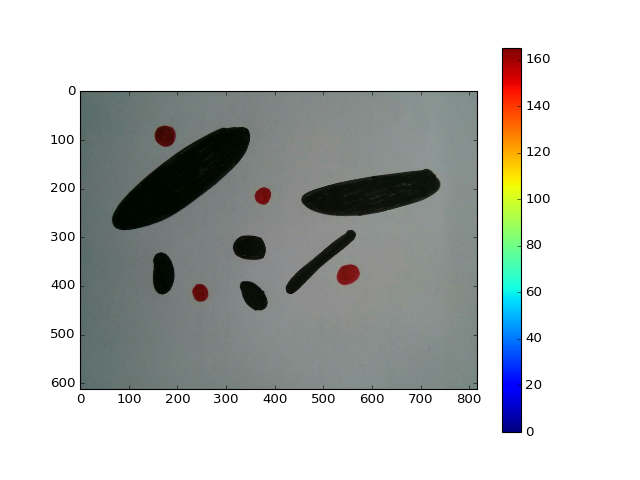

In [3]:
im = Image.open(path)
Nc, Nl = im.size
im = im.resize((Nc // 4 ,Nl // 4),Image.ANTIALIAS)
fig, ax = plt.subplots()
#ax.axis("off")
plt.imshow(im)
plt.colorbar()
plt.show()

In [4]:
R, G, B = im.split()
R = np.array(R)
G = np.array(G)
B = np.array(B)

<IPython.core.display.Javascript object>


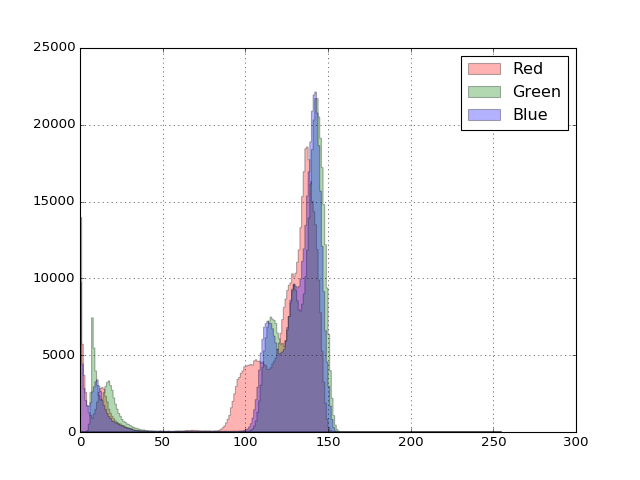

In [10]:
plt.figure()
plt.hist(R.flatten(), bins = np.arange(256), histtype = "stepfilled", color = "r", alpha = .3, label = "Red")
plt.hist(G.flatten(), bins = np.arange(256), histtype = "stepfilled", color = "g", alpha = .3, label = "Green")
plt.hist(B.flatten(), bins = np.arange(256), histtype = "stepfilled", color = "b", alpha = .3, label = "Blue")
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


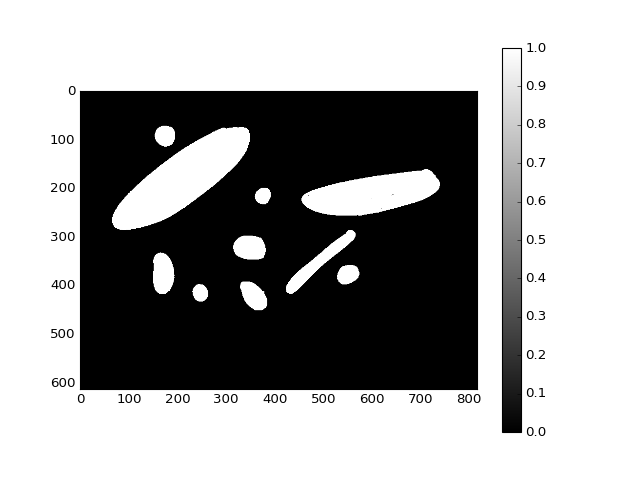

In [9]:
Bt = B < 50
plt.figure()
plt.imshow(Bt, cmap = cm.gray)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


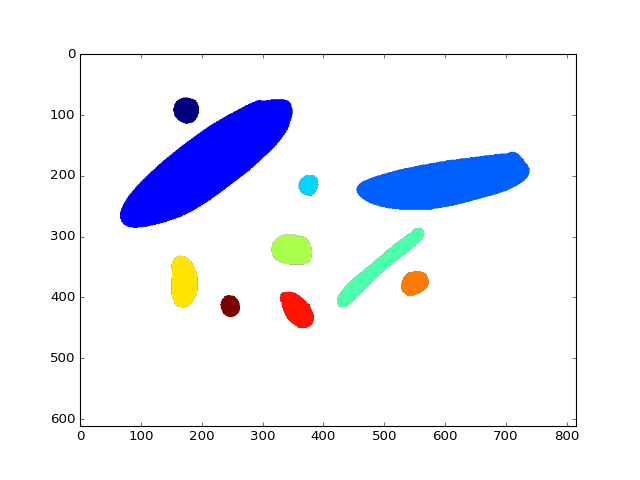

10

In [11]:
Btc = ndimage.binary_closing(Bt, structure = np.ones((3, 3)))


Bl, number  = ndimage.measurements.label(Btc)
plt.figure()
plt.imshow(np.where(Bl !=0, Bl, np.nan), cmap = cm.jet)
plt.show()
number

In [12]:
obj = ndimage.measurements.find_objects(Bl)
len(obj)

10

In [14]:
data = pd.DataFrame(columns = ["A", "xg", "yg", "Ixx", "Iyy", "Ixy", "dx", "dy", "theta"])
for i in range(len(obj)):
    y, x = np.where(Bl == i+1)
    xg, yg = x.mean(), y.mean()
    x = x - xg
    y = y - yg
    A = len(x)
    Ixx = (y**2).sum()
    Iyy = (x**2).sum()
    Ixy = (x*y).sum()
    I = np.array([[Ixx, -Ixy], [-Ixy, Iyy]])
    eigvals, eigvecs = np.linalg.eig(I)
    loc = np.argsort(eigvals)[::-1]
    d = eigvecs[loc[0]]
    theta =  np.degrees(np.arccos(d[1]))
    
    data.loc[i+1] = [A, xg, yg, Ixx, Iyy, Ixy, d[0], d[1], theta]
data.sort_values("A", inplace = True, ascending = False)

data

,A,xg,yg,Ixx,Iyy,Ixy,dx,dy,theta
2,27027.0,209.302290,181.378177,7.734228e+07,1.359400e+08,-8.440976e+07,0.579693,-0.814835,144.571017
3,17453.0,599.292901,211.972841,8.566289e+06,9.186670e+07,-1.365328e+07,0.157723,-0.987483,170.925219
5,4204.0,489.863939,351.528544,4.999944e+06,6.511936e+06,-5.509217e+06,0.657286,-0.753641,138.906776
7,3036.0,169.758564,375.067194,1.450084e+06,3.798200e+05,4.406825e+04,0.999156,0.041071,87.646151
6,2736.0,347.711988,322.389620,4.475187e+05,8.067210e+05,5.122902e+04,-0.138483,-0.990365,172.039928
9,2291.0,355.784810,420.938455,5.292923e+05,4.343549e+05,2.315987e+05,0.774851,0.632144,50.791492
1,1438.0,174.128651,93.488178,1.673353e+05,1.624652e+05,3.090687e+03,0.899685,0.436540,64.116701
8,1433.0,548.956036,377.110258,1.465966e+05,1.902682e+05,-3.229605e+04,0.468985,-0.883206,152.031595
10,905.0,246.251934,414.708287,7.372699e+04,5.801256e+04,4.876510e+03,0.961680,0.274173,74.087280
4,872.0,374.793578,216.227064,6.415904e+04,5.789484e+04,-5.656128e+03,0.861521,-0.507722,120.512186


<IPython.core.display.Javascript object>


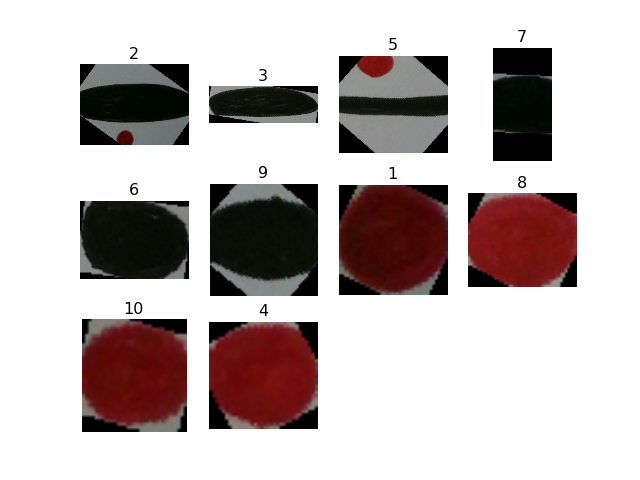

In [16]:
fig = plt.figure()
counter = 1
for i in data.index.values:
    ax = fig.add_subplot(3,4, counter)
    z = Image.fromarray(np.array(im)[obj[i-1]])
    z = z.rotate(data.loc[i, "theta"], expand = False)
    z = np.array(z)
    plt.imshow(z)
    plt.title(str(i))
    ax.axis("off")
    counter += 1
plt.show()    